<a href="https://colab.research.google.com/github/bild12/EspIA/blob/Ciencias/Copy_of_CNN_DesdeCeros_Grupo_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taller CNN_DesdeCeros**

**Especialización en Inteligencia Artificial**

**Pontificia Universidad Javeriana**

GRUPO 7
---
Integrantes:

 * Bibiana Ivette Lopez Dominguez
 * Nicolas Trujillo Barros
 * Julián David Pava Quinguirejo

___
# 1. Ejercicio Evaluación Sumativa

En este ejercicio, se evaluará su capacidad para construir, entrenar y evaluar una red neuronal convolucional (CNN) para la clasificación de imágenes.

Se usará el conjunto de datos CIFAR-10, que consta de 60,000 imágenes en color de 32x32 píxeles, divididas en 10 clases. El objetivo es construir un modelo que pueda clasificar correctamente las imágenes en una de las 10 clases.

Utilice lo visto anteriormente, junto con los otros recursos y conceptos que se han estudiado.

# 2. Estudio y comprensión de los datos

## 2.1 Importar librerias

Se procede a importar las librerías necesarias para ejecutar el modelo esperado con éxito, entre estas podemos encontrar librerías de machine learning y deep learning utilizadas en el código para calcular y entrenar redes neuronales profundas mediante modelos secuenciales, capas convolucionales, de normalización, agrupamiento, entre otros. Estas librerías permiten trabajar con datos para el entrenamiento y validación del modelo, asi pues, se aplicará técnicas como dropout y learning rate scheduling para mejorar el entrenamiento del modelo.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from scipy.signal import convolve2d
from skimage import data
from skimage.measure import block_reduce
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import (
    Activation,
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    MaxPooling2D
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2


## 2.2. Cargar y ajustar los datos

En esta fase se importa el data Set Cifar -10, se procede a clasificar las imagenes para entrenamiento y validación, se asigna cada una de sus clases y finalmente se realiza una prueba aleatoria con los datos de entrenamiento, esto con el fin de pasar a generar el modelo basado en estos datos.

In [ ]:
# Importar el dataset CIFAR-10
from keras.datasets import cifar10

In [ ]:
# Claisifcador de imágenes de fashion MNIST
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño de clases del entrenamiento:", y_train.shape)
print("Tamaño del set de validación:", X_test.shape)
print("Tamaño del clases de la validación:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Tamaño del set de entrenamiento: (50000, 32, 32, 3)
Tamaño de clases del entrenamiento: (50000, 1)
Tamaño del set de validación: (10000, 32, 32, 3)
Tamaño del clases de la validación: (10000, 1)


In [ ]:
# Se realiza la normalización para proceder a entrenar el modelo
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Se definen las clases
clases = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
          'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

<ipython-input-6-5b57a1427185>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Imagen: {imagen}, Clase: {clases[int(y_train[imagen])]}")


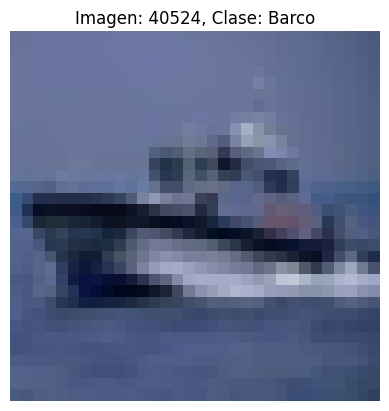

In [ ]:
imagen = int(np.random.uniform(0, 50000))
plt.imshow(X_train[imagen])
plt.title(f"Imagen: {imagen}, Clase: {clases[int(y_train[imagen])]}")
plt.axis("off")
plt.show()


## 2.3.Diseño y entrenamiento de la red neuronal convolucional

Este modelo es una red neuronal convolucional profunda diseñada especificamente para clasificar imágenes del dataset Cifar-10. Utiliza tres bloques de convolución seguidos de capas de normalización, activación ReLU, y reducción de dimensionalidad mediante MaxPooling, incorporando además Dropout para evitar el sobreajuste.

A medida que avanza en profundidad, incrementa el número de filtros y la tasa de Dropout para capturar patrones más complejos y generalizar mejor. Al final, a través de una capa Flatten y dos capas densas, el modelo transforma las características extraídas en probabilidades de clasificación mediante softmax. Se entrena usando el optimizador Adam con una tasa de aprendizaje pequeña y técnicas de aumento de datos para mejorar la robustez del modelo ante variaciones en las imágenes de entrada.

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), kernel_initializer='he_normal', padding='same', input_shape=(32, 32, 3)),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), kernel_initializer='he_normal', padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(32, (3,3), kernel_initializer='he_normal', padding='same'),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), kernel_initializer='he_normal', padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(64, (3,3), kernel_initializer='he_normal', padding='same'),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), kernel_initializer='he_normal', padding='same'),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, kernel_initializer='he_normal'),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │             

 Total params: 218,090 (851.91 KB)

 Trainable params: 217,322 (848.91 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 259s 323ms/step - accuracy: 0.2876 - loss: 2.2322 - val_accuracy: 0.5024 - val_loss: 1.3615
Epoch 2/20
221/782 ━━━━━━━━━━━━━━━━━━━━ 2:53 309ms/step - accuracy: 0.4784 - loss: 1.4182

## 2.4. Evaluación del modelo

En esta etapa se procede a validar el modelo evaluando sus métricas de rendimiento y su capacidad de predicción, así como otras medidas que permiten comprender mejor su comportamiento. Finalmente, se realizan dos validaciones aleatorias: la primera con imágenes que coinciden entre el conjunto de entrenamiento y el de prueba, y la segunda con imágenes que no coinciden.

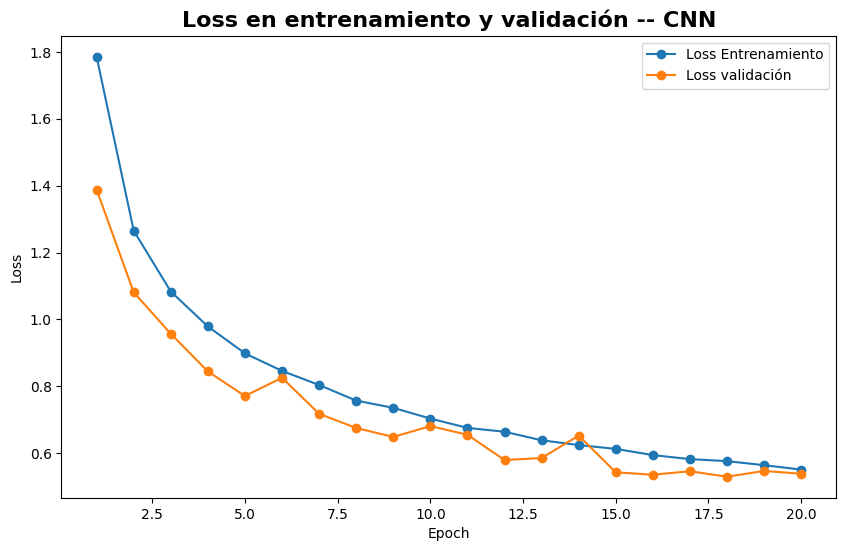

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(epochs, train_loss, marker = 'o', label='Loss Entrenamiento')
ax.plot(epochs, val_loss, marker = 'o', label='Loss validación')

title_config = {'fontsize': 16, 'color': 'black', 'fontweight': 'bold'} # Example settings

plt.title('Loss en entrenamiento y validación -- CNN', **title_config)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.show()

El gráfico muestra la evolución de la pérdida durante el entrenamiento y la validación a lo largo de 20 epochs.

Se observa una disminución constante en ambas curvas, lo que indica que el modelo está aprendiendo correctamente y de manera progresiva; La pérdida de validación es consistentemente más baja que la de entrenamiento, lo cual podemos interpretar como una buena señal de generalización; sin embargo, hay un pico repentino en la pérdida de validación en el epoch 14, lo que podría darse por una un batch atípico, aunque luego la tendencia descendente continúa.

Como conclusión, el comportamiento del gráfico sugiere que el modelo funciona adecuadamente, sin señales sobreajuste.

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_prob = model.predict(X_test)

# Obtener las clases predichas tomando el índice de la mayor probabilidad
y_pred = np.argmax(y_prob, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


En este tramo de codigo se hace validaciones del conjunto de prueba del modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.4f}")


Precisión del modelo en el conjunto de prueba: 0.8187


Una precisión de 0.8086 en el conjunto de prueba indica que el modelo es capaz de clasificar correctamente aproximadamente el 81% de las muestras.

Este resultado sugiere un buen desempeño general y una capacidad adecuada de generalización a nuevos datos. Aunque no es una precisión perfecta, el modelo ha aprendido patrones relevantes sin caer en sobreajuste, se hará ahora un analisis mas profundo basado en otras metricas.

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.93      0.89      0.91      1000
           2       0.79      0.69      0.74      1000
           3       0.74      0.61      0.67      1000
           4       0.80      0.82      0.81      1000
           5       0.73      0.76      0.74      1000
           6       0.81      0.90      0.85      1000
           7       0.88      0.85      0.86      1000
           8       0.85      0.92      0.89      1000
           9       0.81      0.94      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



El modelo muestra un desempeño desigual al momento de aprender entre clases, con un accuracy global del 81%. Mientras que algunas clases como 1, 8 y 9 ( coches, barcos, camiones) tienen un F1-score alto (0.87-0.90), otras como la clase 3 (pájaros) y 5 (perros) presentan dificultades evidentes (F1-score ≤0.72).

Estas novedades sugieren que el modelo no visualiza patrones tan evidentes en estas categorías. La brecha entre precision y recall en clases problemáticas (pájaros con 62% precision vs 71% recall) nos puede decir que el modelo comete tanto falsos positivos como falsos negativos mas altos en estas categorias.

Como conclusión,el modelo con un accuracy del0.81 nos da a entender que no existe desbalanceo, pero si limitaciones en características aprendidas para clases específicas.

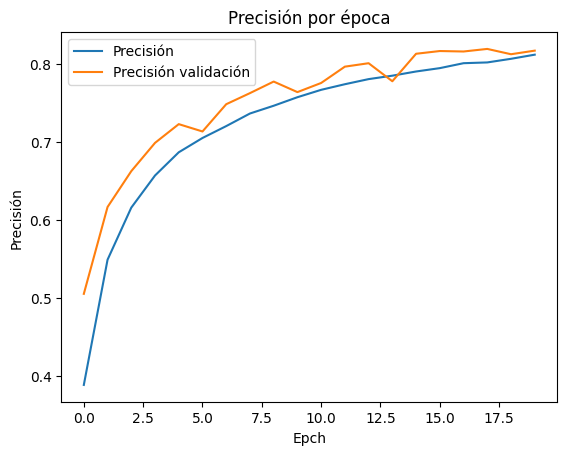

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.legend()
plt.title('Precisión por época')
plt.xlabel('Epch')
plt.ylabel('Precisión')
plt.show()


La gráfica muestra la evolución de la precisión del modelo tanto en los datos de entrenamiento como en los de validación a lo largo de 20 epochs.

Se observa una mejora constante en ambas curvas, lo que indica que el modelo está aprendiendo progresivamente; durante la mayor parte del entrenamiento, la precisión en validación es ligeramente superior a la de entrenamiento, lo cual sugiere una buena capacidad de generalización; sin embargo, hay una pequeña caída en la precisión de validación alrededor del epoch 15, el modelo se recupera y ambas curvas convergen cerca del 82% de precisión al final del proceso, indicando convergencia sin señales de sobreajuste.

## 2.5.Visualización de resultados

En este punto se realizan pruebas utilizando datos de validación, así como una matriz de correlación, con el objetivo de evaluar si el modelo se comporta de manera adecuada y logra establecer relaciones correctas entre las imágenes analizadas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


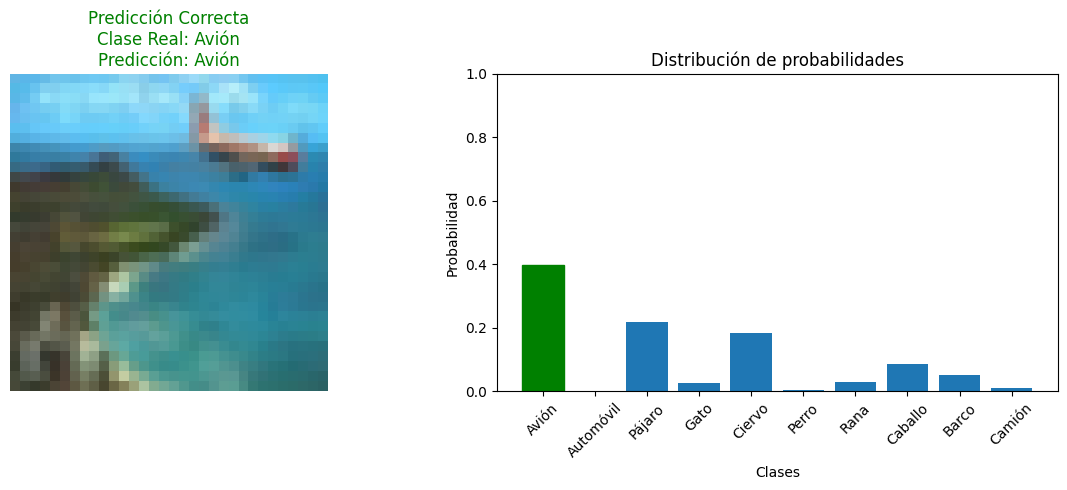

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_flat = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

correct_indices = np.where(y_pred_classes == y_test_flat)[0]

if len(correct_indices) > 0:
    random_correct_idx = np.random.choice(correct_indices)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(X_test[random_correct_idx])
    plt.title(f"Predicción Correcta\nClase Real: {clases[y_test_flat[random_correct_idx]]}\nPredicción: {clases[y_pred_classes[random_correct_idx]]}",
              color='green')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    bars = plt.bar(range(10), y_pred[random_correct_idx])

    for i, bar in enumerate(bars):
        if i == y_pred_classes[random_correct_idx]:
            bar.set_color('green')
        elif i == y_test_flat[random_correct_idx]:
            bar.set_color('blue')

    plt.xticks(range(10), clases, rotation=45)
    plt.title("Distribución de probabilidades")
    plt.ylabel("Probabilidad")
    plt.xlabel("Clases")
    plt.ylim([0, 1])

    plt.tight_layout()
    plt.show()

else:
    print("NA")

En este módulo se pueden observar imágenes aleatorias correspondientes a cada una de las categorías. Al ejecutarlo, se muestra la distribución de probabilidades, lo cual permite visualizar cómo el modelo analizó cada imagen.

Además, se pueden identificar los patrones que el modelo reconoció en relación con otras categorías, con el objetivo de evaluar la precisión y efectividad del modelo realizado.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


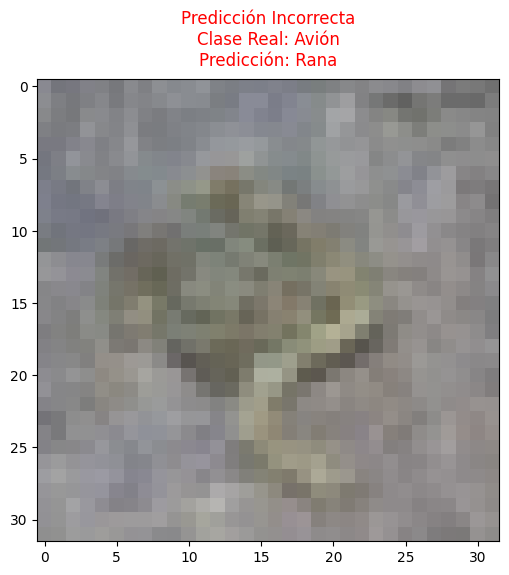

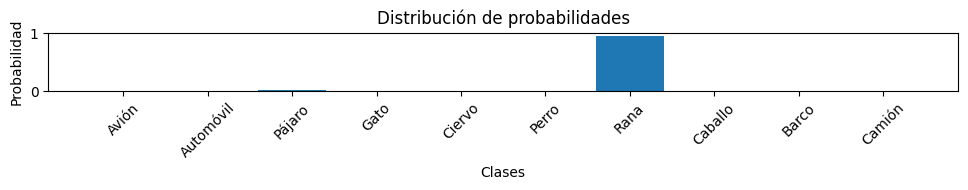

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

y_test_flat = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test

incorrect_indices = np.where(y_pred_classes != y_test_flat)[0]

if len(incorrect_indices) > 0:
    random_incorrect_idx = np.random.choice(incorrect_indices)

    plt.figure(figsize=(6, 6))
    plt.imshow(X_test[random_incorrect_idx])
    plt.title(f"Predicción Incorrecta\nClase Real: {clases[y_test_flat[random_incorrect_idx]]}\nPredicción: {clases[y_pred_classes[random_incorrect_idx]]}",
              color='red', pad=10)

    plt.figure(figsize=(10, 2))
    plt.bar(range(10), y_pred[random_incorrect_idx])
    plt.xticks(range(10), clases, rotation=45)
    plt.title("Distribución de probabilidades")
    plt.ylabel("Probabilidad")
    plt.xlabel("Clases")
    plt.tight_layout()
    plt.show()

else:
    print("NA")


Por otro lado, en este módulo se pueden observar imágenes aleatorias que no coinciden en categoria, al ejecutarlo, se muestra la distribución de probabilidades, lo cual permite visualizar cómo el modelo analizó cada imagen, esta diferencia entre categorias se puede deber a problemas de etiquetado o análisis incorrecto del modelo.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


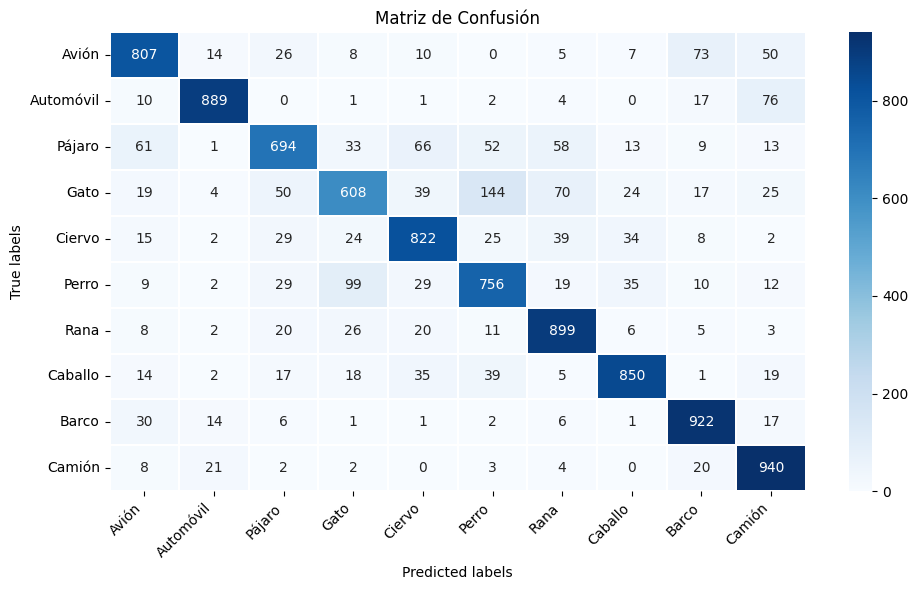

In [ ]:

clases = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
          'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']


y_prob = model.predict(X_test)

y_pred = np.argmax(y_prob, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(
    confusion_mtx,
    fmt='g',
    cmap='Blues',
    annot=True,
    annot_kws={"size": 10},
    linewidths=.1,
    xticklabels=clases,
    yticklabels=clases
)

plt.grid(False)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

En esta matriz de confusión podemos observar que la mayoría de las predicciones se concentran en el punto de encuentro, lo que indica que el modelo clasifica correctamente una alta proporción de los casos.

Por ejemplo, podemos observar clases como “Camión”, “Caballo" y “Rana” con altos niveles de precisión; sin embargo, hay ciertas confusiones notables, como en la categoría “Pájaro”, que fue confundida con frecuencia con “Gato”, “Perro”, entre otras, lo que sugiere que estas clases comparten características visuales similares.

Podemos inducir que éste tipo de errores proporciona información sobre las limitaciones del modelo y puede guiar mejoras futuras, como un refuerzo en el entrenamiento con ejemplos más diferenciados entre categorías similares, así como alimentación de mas imagenes (sobretodo las relacionadas a categorias con peores desempeños).